In [1]:
import os
import keras
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
# import and "clean" data

In [3]:
epochs = 5
batch_size = 5
target_width = 50
target_height = 50
target_size = (target_width, target_height)
target_shape = (target_width, target_height, 3) # 3 for color
base_dir = 'Course notebooks\paintings'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(train_dir, target_size, batch_size= batch_size)
test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir, target_size, batch_size= batch_size)
validation_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(validation_dir, target_size, batch_size= batch_size)

Found 210 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [4]:
numOfClasses = train_gen.num_classes

numOfTrainSamples = train_gen.n
numOfTestSamples = test_gen.n
numOfValSamples = validation_gen.n

In [5]:
# Define model

In [6]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=target_shape))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(27, activation='relu'))
model.add(layers.Dense(numOfClasses, activation='sigmoid'))

In [7]:
# train model

In [8]:
model.compile(loss="categorical_crossentropy", optimizer="RMSprop", metrics=["acc"])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 7500)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               3840512   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 27)                13851     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 84        
Total params: 3,854,447
Trainable params: 3,854,447
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit_generator(
    train_gen,
    steps_per_epoch= numOfTrainSamples / batch_size,
    validation_data= validation_gen,
    validation_steps= numOfValSamples / batch_size,
    epochs= epochs
)

Epoch 1/5
42/42 [==============================] - 6s 132ms/step - loss: 2.1377 - acc: 0.3190 - val_loss: 1.0986 - val_acc: 0.3333
Epoch 2/5
42/42 [==============================] - 5s 125ms/step - loss: 1.0986 - acc: 0.3381 - val_loss: 1.0986 - val_acc: 0.3333
Epoch 3/5
42/42 [==============================] - 6s 134ms/step - loss: 1.0986 - acc: 0.3381 - val_loss: 1.0986 - val_acc: 0.3333
Epoch 4/5
42/42 [==============================] - 5s 125ms/step - loss: 1.2337 - acc: 0.3571 - val_loss: 1.0986 - val_acc: 0.4333
Epoch 5/5
42/42 [==============================] - 5s 127ms/step - loss: 1.1272 - acc: 0.3714 - val_loss: 1.0986 - val_acc: 0.4000


In [11]:
model.save('baseline.h5')

In [12]:
# validation

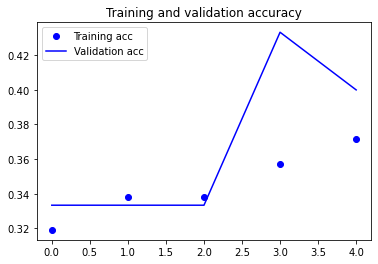

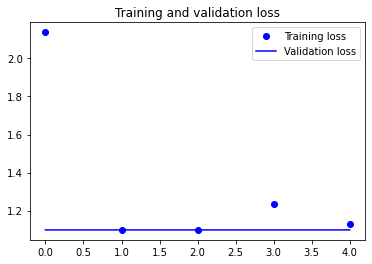

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()